# Import 버전들 확인

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import sklearn
import sys
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate, RepeatedKFold
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm, randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, RidgeCV 

print('Numpy Version', np.__version__)
print('Pandas Version', pd.__version__)
print('Matplotlib Version', matplotlib.__version__)
print('Scikit-Learn Version', sklearn.__version__)
print('Tensorflow Version', tf.__version__)
print('Python Version', sys.version)

C:\Users\dino3\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\dino3\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\dino3\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Numpy Version 1.23.5
Pandas Version 1.5.3
Matplotlib Version 3.6.3
Scikit-Learn Version 1.2.1
Tensorflow Version 2.12.0
Python Version 3.11.1 (tags/v3.11.1:a7a450f, Dec  6 2022, 19:58:39) [MSC v.1934 64 bit (AMD64)]


In [2]:
%matplotlib inline

DATA 읽어오기

In [3]:
raw_data = pd.read_excel('data_new/CERML_origin.xlsx')
print(raw_data)
feature_names = np.array(['Nnum', 'ed', 'Qe', 'Ecohe', 'EN', 'EA', 'I', 'rcov', 'rZ', 'Ne', 'N', 'dMN'])

print(feature_names)

     M      G_Cl  Nnum    ed    Qe  Ecohe    EN    EA     I  rcov    rZ  Ne  \
0   Mn  0.795966     4 -0.83  1.24  -0.36  1.55 -0.50  7.43  1.39  0.23   5   
1   Fe  0.858026     4 -0.62  1.37  -3.15  1.83  0.15  7.90  1.32  0.22   6   
2   Co  1.150586     4 -1.01  0.91  -2.81  1.88  0.66  7.88  1.26  0.21   7   
3   Ni  1.829476     4 -1.17  0.77  -4.69  1.92  1.16  7.64  1.24  0.20   8   
4   Cu  1.902396     4 -1.50  0.71  -2.48  1.90  1.24  7.73  1.32  0.19  10   
..  ..       ...   ...   ...   ...    ...   ...   ...   ...   ...   ...  ..   
70   W -2.478654     0 -0.90  1.73  -4.03  2.36  0.82  7.98  1.62  0.59   4   
71  Os -1.067414     0 -1.17  1.14  -2.09  2.20  1.08  8.71  1.44  0.54   6   
72  Ir -0.004404     0 -0.94  0.60  -1.82  2.20  1.56  8.97  1.41  0.53   7   
73  Pt  1.471646     0 -1.52  0.50  -3.19  2.28  2.13  8.96  1.36  0.51   9   
74  Au  1.570000     0 -3.33  0.50  -1.24  2.54  2.31  9.23  1.36  0.49  10   

     N   dMN  
0   25  2.22  
1   26  2.32  
2   27

# Data preprocessing

In [4]:
print(raw_data)
data_cleaned = raw_data.iloc[:,2:] # input data들만 모은 array
print(data_cleaned)

     M      G_Cl  Nnum    ed    Qe  Ecohe    EN    EA     I  rcov    rZ  Ne  \
0   Mn  0.795966     4 -0.83  1.24  -0.36  1.55 -0.50  7.43  1.39  0.23   5   
1   Fe  0.858026     4 -0.62  1.37  -3.15  1.83  0.15  7.90  1.32  0.22   6   
2   Co  1.150586     4 -1.01  0.91  -2.81  1.88  0.66  7.88  1.26  0.21   7   
3   Ni  1.829476     4 -1.17  0.77  -4.69  1.92  1.16  7.64  1.24  0.20   8   
4   Cu  1.902396     4 -1.50  0.71  -2.48  1.90  1.24  7.73  1.32  0.19  10   
..  ..       ...   ...   ...   ...    ...   ...   ...   ...   ...   ...  ..   
70   W -2.478654     0 -0.90  1.73  -4.03  2.36  0.82  7.98  1.62  0.59   4   
71  Os -1.067414     0 -1.17  1.14  -2.09  2.20  1.08  8.71  1.44  0.54   6   
72  Ir -0.004404     0 -0.94  0.60  -1.82  2.20  1.56  8.97  1.41  0.53   7   
73  Pt  1.471646     0 -1.52  0.50  -3.19  2.28  2.13  8.96  1.36  0.51   9   
74  Au  1.570000     0 -3.33  0.50  -1.24  2.54  2.31  9.23  1.36  0.49  10   

     N   dMN  
0   25  2.22  
1   26  2.32  
2   27

여기서부터 Supervised Learning Part (SVM, Randomforest, NN)

Training set 나누기!

In [5]:
x = data_cleaned.astype(float)
y = raw_data.iloc[:,1].astype(float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)  # 적당한 비율로 training과 test set을 나누는 부분

# SVM

In [6]:
fs = 30
fs1 = 18

In [7]:
pipe = Pipeline([
    ('scaler', StandardScaler()),  # 표준화 단계
    ('svm', SVR(kernel='rbf'))  # SVM 단계
])

param_dist = {
    'svm__C': np.exp(norm(loc=0, scale=1).rvs(1000)),  # C 매개변수
    'svm__gamma': np.exp(norm(loc=0, scale=1).rvs(1000)),  # gamma 매개변수
}

# 무작위 검색 설정
svr_rnd_search = RandomizedSearchCV(pipe, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, scoring='neg_mean_squared_error',)

In [8]:
svr_rnd_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svm', SVR())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'svm__C': array([ 0.18471393,  2.38056829,  0.52106658,  1.00797477,  1.36563768,
        1.50425281,  3.48125457,  1.43573137,  0.37262978,  5.5887033 ,
        0.57918881,  1.19397393,  0.2982785 ,  1.20101398,  0.40943668,
        0.47730873,  3.83801806,  0.31132303,  1....
        1.68515845,  1.17258231,  1.38997871,  0.29704485,  0.54404571,
        1.82650114,  4.14167104,  0.54625638,  0.54424769,  0.46417127,
        0.38555368,  2.20657593,  0.79824865,  1.20554181,  1.98545921,
        0.72708083,  2.02399618,  2.45529955,  1.2195828 ,  1.61018654,
        4.45043872,  0.37440361,  0.23263397,  1.4118395 ,  0.67622597,
        1.83662482,  0.58665222,  1.19244558,  0.79480526,  1.05758671])},
                   scoring='neg_mean_squared_error')

In [9]:
print('Best Estimator ', svr_rnd_search.best_estimator_) # 위의 radomized search로 최고의 hyperparameter를 찾음!

print('Score on training set: ', svr_rnd_search.best_estimator_.score(x_train, y_train))
print('Score on test set: ', svr_rnd_search.best_estimator_.score(x_test, y_test))

Best Estimator  Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVR(C=1.2836114473394713, gamma=0.07281050795305563))])
Score on training set:  0.9653514572558437
Score on test set:  0.8716612943033639


In [10]:
predict_svr_train = svr_rnd_search.best_estimator_.predict(x_train) # x_train를 넣어본 output
predict_svr = svr_rnd_search.best_estimator_.predict(x_test) # x_test를 넣어본 output

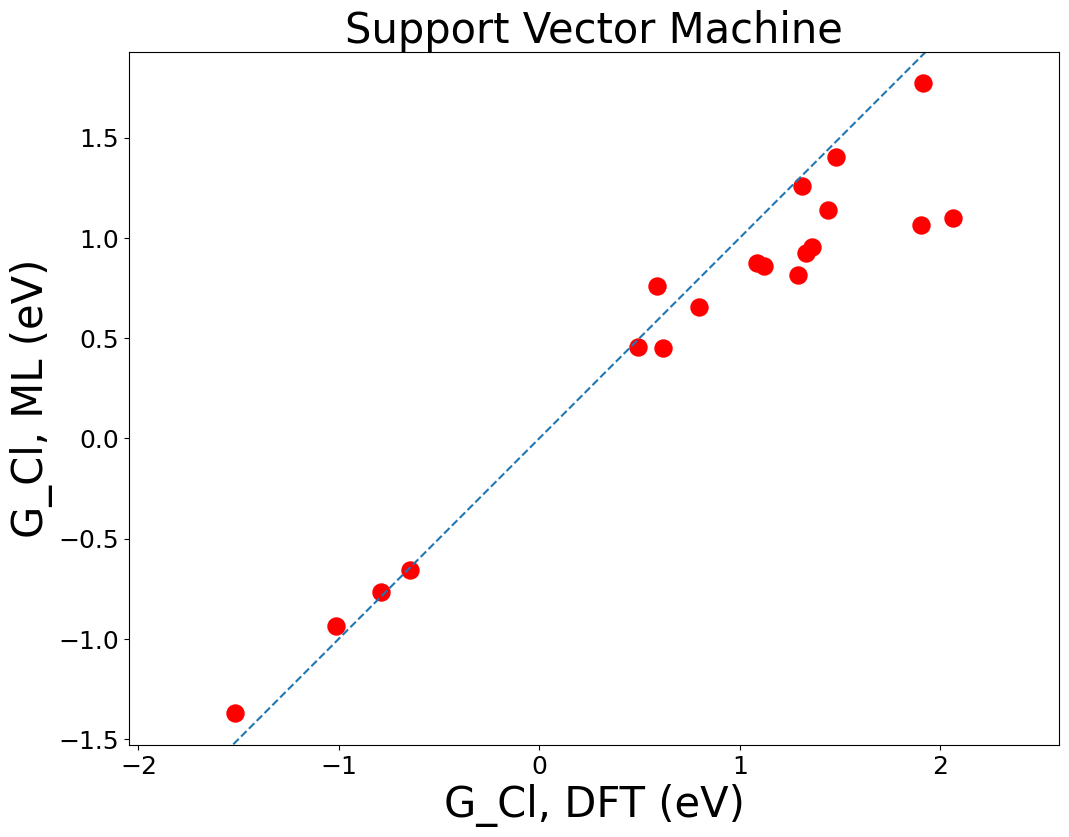

In [11]:
plt.figure(figsize=(12,9))

plt.scatter(y_test, predict_svr, color = 'r', s=150) # y_test가 real value, predic_svr이 학습한 data로 넣어본 value
plt.title('Support Vector Machine', fontsize=fs)
plt.xlabel('G_Cl, DFT (eV)', fontsize=fs)
plt.ylabel('G_Cl, ML (eV)', fontsize=fs)
plt.xticks(fontsize=fs1)
plt.yticks(fontsize=fs1)
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-1000, 1000], [-1000,1000], linestyle='dashed');

# Random Forest

In [12]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor())
])

# 파라미터 그리드 설정
param_grid = {
    'rf__n_estimators': randint(100, 500),  # 100에서 500 사이의 정수 랜덤 선택
    'rf__max_leaf_nodes': randint(10, 100)  # 10에서 100 사이의 정수 랜덤 선택
}

# 랜덤 서치 수행
rf_rnd_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=100,  # 100개의 랜덤한 조합 시도
    cv=5,  # 5-fold 교차 검증
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

# 데이터에 대해 랜덤 서치 수행
rf_rnd_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('rf', RandomForestRegressor())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'rf__max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002546E16BC50>,
                                        'rf__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002546E0A9890>},
                   random_state=42, scoring='neg_mean_squared_error')

In [13]:
# 최적의 모델 및 파라미터 출력
print("Best Estimator:", rf_rnd_search.best_estimator_)

print('Score on training set:', rf_rnd_search.best_estimator_.score(x_train, y_train))
print('Score on test set:', rf_rnd_search.best_estimator_.score(x_test, y_test))

Best Estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_leaf_nodes=73, n_estimators=230))])
Score on training set: 0.9928820830359851
Score on test set: 0.931098065257476


In [14]:
predict_rf_train = rf_rnd_search.best_estimator_.predict(x_train) # 최고의 개수로 학습한 거에 x_train을 넣은 결과
predict_rf = rf_rnd_search.best_estimator_.predict(x_test) # 최고의 개수로 학습한 거에 x_test를 넣은 결과

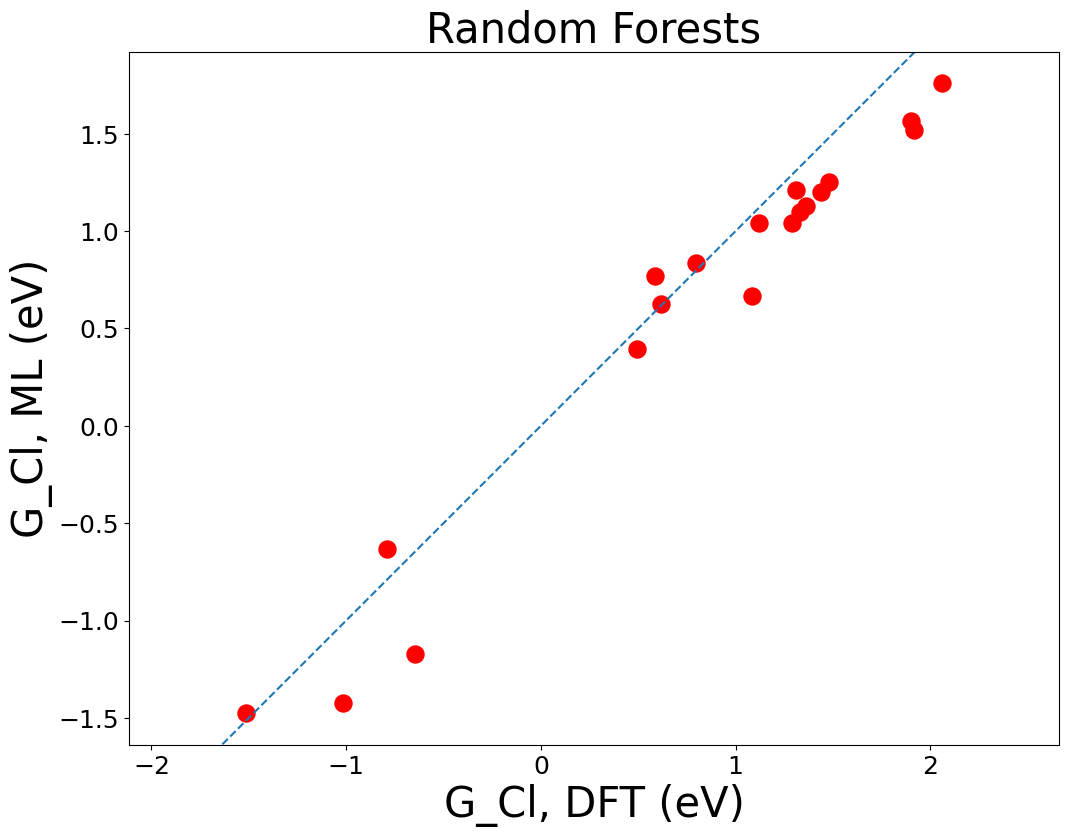

In [15]:
plt.figure(figsize=(12,9))
plt.scatter(y_test, predict_rf, color='r', s=150) # pairity plot 그리기!!
plt.title('Random Forests', fontsize=fs)
plt.xlabel('G_Cl, DFT (eV)', fontsize=fs)
plt.ylabel('G_Cl, ML (eV)', fontsize=fs)
plt.xticks(fontsize=fs1)
plt.yticks(fontsize=fs1)
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-1000, 1000], [-1000, 1000], linestyle='dashed');

# Neural Network

In [16]:
def build_model(n_hidden=1, n_neurons=30):
    model = Sequential()
    model.add(Dense(n_neurons, activation="relu", kernel_initializer="he_normal", input_shape=x_train.shape[1:]))
    for _ in range(n_hidden):
        model.add(Dense(n_neurons, activation="relu", kernel_initializer="he_normal"))
        model.add(BatchNormalization())
    model.add(Dense(1))
    model.compile(loss="mse", optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999))
    return model

keras_reg = KerasRegressor(build_model)

param_distribs = {
    "kerasregressor__n_hidden": [0, 1, 2, 3],
    "kerasregressor__n_neurons": np.arange(1, 150),
}

pipeline = Pipeline([
    ("std_scaler", StandardScaler()),
    ("kerasregressor", keras_reg)
])

nn_rnd_search = RandomizedSearchCV(pipeline, param_distribs, n_iter=100, cv=5, n_jobs=-1)

nn_rnd_search.fit(x_train, y_train, kerasregressor__epochs=100)

print("Best parameters: ", nn_rnd_search.best_params_)

C:\Users\dino3\AppData\Local\Temp\ipykernel_2868\2026098280.py:11: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = KerasRegressor(build_model)
C:\Users\dino3\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 4.7402
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 4.1417
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 3.4617
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 2.9206
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 2.4769
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 2.0447
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 1.7301
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 1.4137
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 1.1572
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.9684
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7928
Epoch 12/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6570
Epoch 13/100
2/2 [==============================] - 0s 3ms/st

In [17]:
for i in range(len(nn_rnd_search.cv_results_['params'])):
    print("Parameters: ", nn_rnd_search.cv_results_['params'][i])
    print("Mean Test Score: ", nn_rnd_search.cv_results_['mean_test_score'][i])
    print("Rank: ", nn_rnd_search.cv_results_['rank_test_score'][i])
    print()

Parameters:  {'kerasregressor__n_neurons': 125, 'kerasregressor__n_hidden': 3}
Mean Test Score:  -0.2591188758611679
Rank:  58

Parameters:  {'kerasregressor__n_neurons': 71, 'kerasregressor__n_hidden': 1}
Mean Test Score:  -0.2623577624559402
Rank:  59

Parameters:  {'kerasregressor__n_neurons': 76, 'kerasregressor__n_hidden': 3}
Mean Test Score:  -0.21826568245887756
Rank:  39

Parameters:  {'kerasregressor__n_neurons': 65, 'kerasregressor__n_hidden': 0}
Mean Test Score:  -0.12858976647257805
Rank:  5

Parameters:  {'kerasregressor__n_neurons': 97, 'kerasregressor__n_hidden': 1}
Mean Test Score:  -0.22242767810821534
Rank:  41

Parameters:  {'kerasregressor__n_neurons': 104, 'kerasregressor__n_hidden': 3}
Mean Test Score:  -0.33227459192276
Rank:  83

Parameters:  {'kerasregressor__n_neurons': 77, 'kerasregressor__n_hidden': 0}
Mean Test Score:  -0.16327032782137393
Rank:  14

Parameters:  {'kerasregressor__n_neurons': 52, 'kerasregressor__n_hidden': 0}
Mean Test Score:  -0.130795012

In [18]:
# 최고의 모델 가져오기
best_model = nn_rnd_search.best_estimator_

# train set 예측 및 R^2 score 계산
predict_nn_train = best_model.predict(x_train)
train_r2 = r2_score(y_train, predict_nn_train)

# test set 예측 및 R^2 score 계산
predict_nn = best_model.predict(x_test)
test_r2 = r2_score(y_test, predict_nn)

print("Train set R^2 score:", train_r2)
print("Test set R^2 score:", test_r2)

1/1 [==============================] - 0s 14ms/step
Train set R^2 score: 0.9778579900333445
Test set R^2 score: 0.9127492953683641


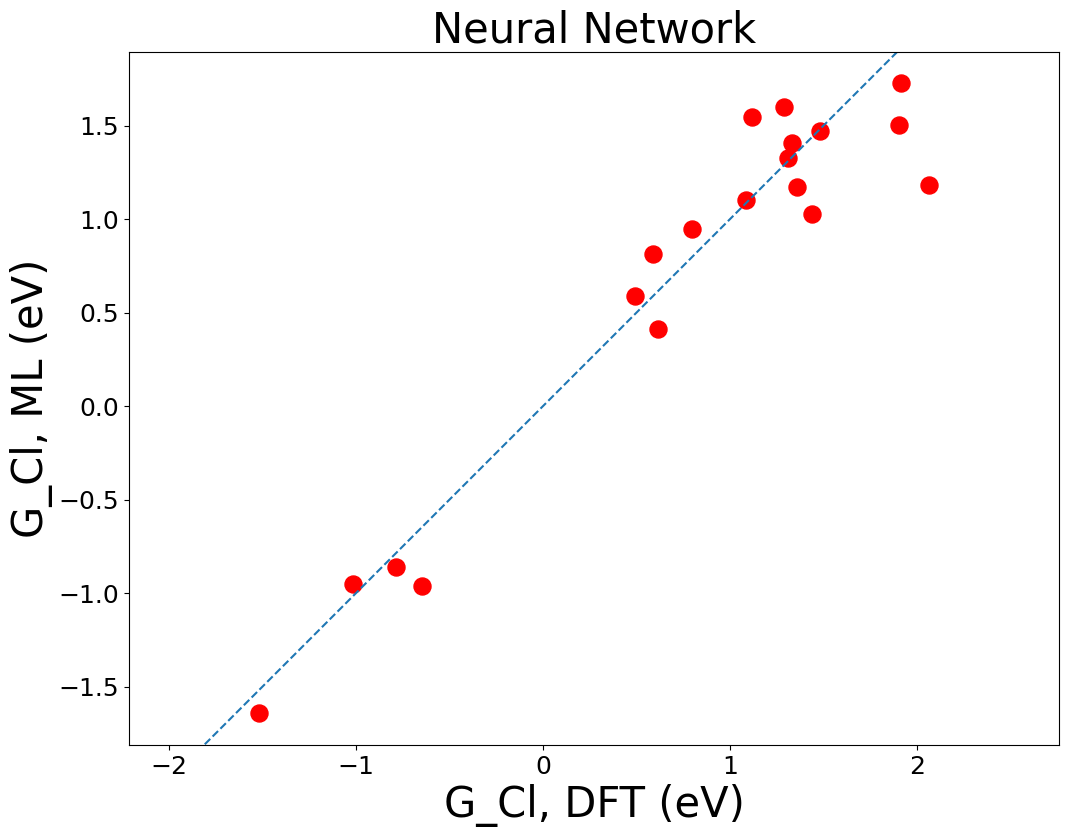

In [19]:
plt.figure(figsize=(12,9))
plt.scatter(y_test, predict_nn, color ='r', s = 150)
plt.title('Neural Network', fontsize=fs)
plt.xlabel('G_Cl, DFT (eV)', fontsize=fs)
plt.ylabel('G_Cl, ML (eV)', fontsize=fs)
plt.xticks(fontsize=fs1)
plt.yticks(fontsize=fs1)
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-1000, 1000], [-1000,1000], linestyle='dashed');

# 3개 Model의 성능 비교

In [20]:
mse_svr_train = mean_squared_error(y_train, predict_svr_train) # svr에서 train set 에러
mse_svr_test = mean_squared_error(y_test, predict_svr) # svr에서 test set 에러

mse_rf_train = mean_squared_error(y_train, predict_rf_train) # rdf에서 train set 에러
mse_rf_test = mean_squared_error(y_test, predict_rf) # rdf에서 test set 에러

mse_nn_train = mean_squared_error(y_train, predict_nn_train) # svr에서 train set 에러
mse_nn_test = mean_squared_error(y_test, predict_nn) # svr에서 test set 에러

print('SVM MSE: ', mse_svr_test)
print('Random Forest MSE: ', mse_rf_test)
print('NN MSE: ', mse_nn_test)

r2_svr_train = r2_score(y_train, predict_svr_train) # svr에서 train set r2 점수
r2_svr_test = r2_score(y_test, predict_svr) # svr에서 test set r2 점수

r2_rf_train = r2_score(y_train, predict_rf_train) # rdf에서 train set r2 점수
r2_rf_test = r2_score(y_test, predict_rf) # rdf에서 test set r2 점수

r2_nn_train = r2_score(y_train, predict_nn_train) # svr에서 train set r2 점수
r2_nn_test = r2_score(y_test, predict_nn) # svr에서 test set r2 점수

print('SVM R^2: ', r2_svr_test)
print('Random Forest R^2: ', r2_rf_test)
print('NN R^2: ', r2_nn_test)

SVM MSE:  0.13268682194370696
Random Forest MSE:  0.07123633277375208
NN MSE:  0.09020675911510519
SVM R^2:  0.8716612943033639
Random Forest R^2:  0.931098065257476
NN R^2:  0.9127492953683641


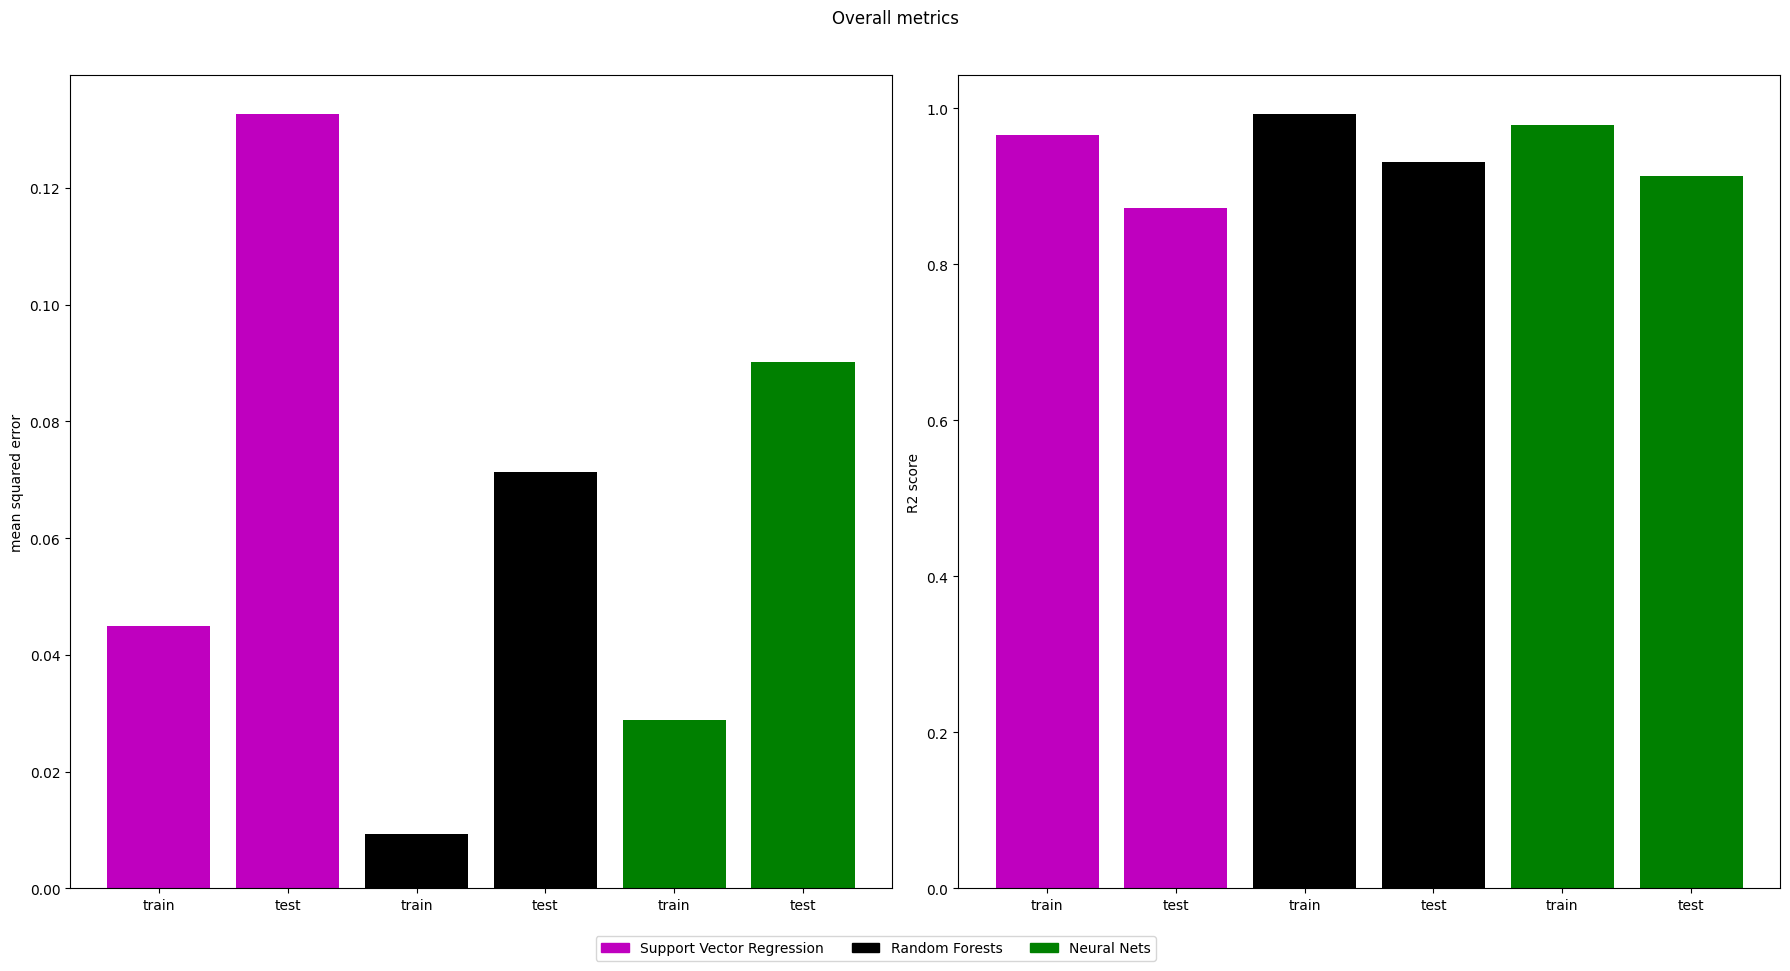

In [21]:
svr = mpatches.Patch(color='m', label='Support Vector Regression')
rf = mpatches.Patch(color='k', label='Random Forests')
nn = mpatches.Patch(color='g', label='Neural Nets')

names = ['train', 'test', 'train', 'test', 'train', 'test']
pos = range(len(names))
colors = ['m', 'm', 'k', 'k', 'g', 'g']
rotation = 0

plt.figure(figsize=(18,9))
plt.suptitle('Overall metrics', y=1.02)
plt.subplot(121)
plt.bar(pos, [mse_svr_train, mse_svr_test, mse_rf_train, mse_rf_test, mse_nn_train, mse_nn_test], color=colors)
plt.xticks(pos, names, rotation=rotation)
plt.ylabel('mean squared error')

plt.subplot(122)
plt.bar(pos, [r2_svr_train, r2_svr_test, r2_rf_train, r2_rf_test, r2_nn_train, r2_nn_test], color=colors)
plt.xticks(pos, names, rotation=rotation)
plt.ylabel('R2 score')

plt.tight_layout()
plt.legend(loc='upper center', handles=[svr, rf, nn], ncol=3, bbox_to_anchor=(-0.1, -0.05));

# Feature Importance Search

### 1. RandomForest 기반 Feature importance

In [22]:
print("Best Estimator:", rf_rnd_search.best_estimator_)

Best Estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_leaf_nodes=73, n_estimators=230))])


In [23]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_scaled = scaler.fit_transform(x)

In [24]:
best_params = rf_rnd_search.best_params_

max_leaf_nodes = best_params['rf__max_leaf_nodes']
n_estimators = best_params['rf__n_estimators']

regressor = RandomForestRegressor(n_estimators=n_estimators, max_leaf_nodes=max_leaf_nodes)

select_features = SelectFromModel(regressor)
# 앞에서 구한 최고의 parameter 사용
select_features.fit(x_train_scaled, y_train)
selected_features = x_train.columns[(select_features.get_support())] # 가장 중요한 feature들을 알려줌!

print(selected_features)

Index(['ed', 'rcov', 'Ne'], dtype='object')


Text(0.5, 0, 'Feature Importance')

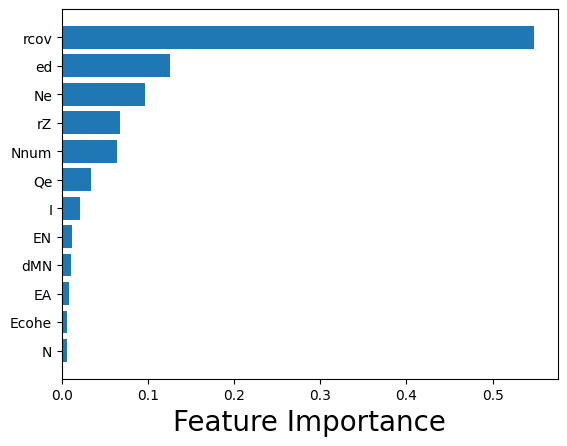

In [25]:
regressor.fit(x_train_scaled, y_train)
sort = regressor.feature_importances_.argsort()
plt.barh(feature_names[sort], regressor.feature_importances_[sort])
plt.xlabel("Feature Importance", fontsize='20')

### 2. Ridge 기반 Feature importance

In [26]:
model = make_pipeline(StandardScaler(), RidgeCV())

model.fit(x_train, y_train)

print(f'model score on training data: {model.score(x_train, y_train)}')
print(f'model score on testing data: {model.score(x_test, y_test)}')

model score on training data: 0.9251639559765392
model score on testing data: 0.8995196534850398


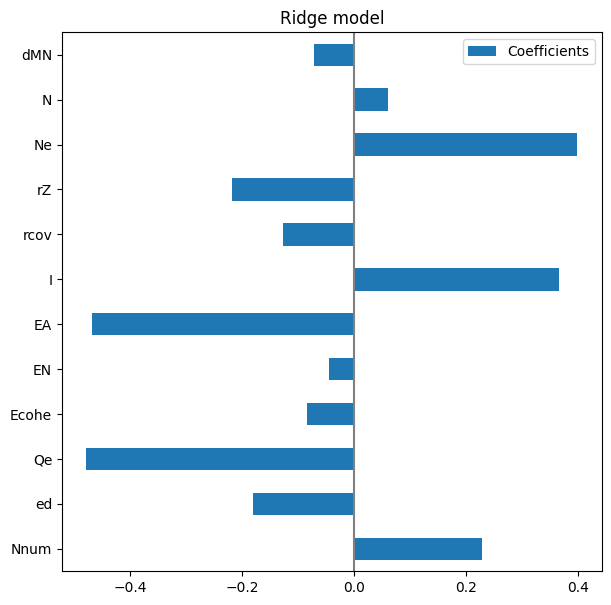

In [27]:
coefs = pd.DataFrame(
   model[1].coef_,
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

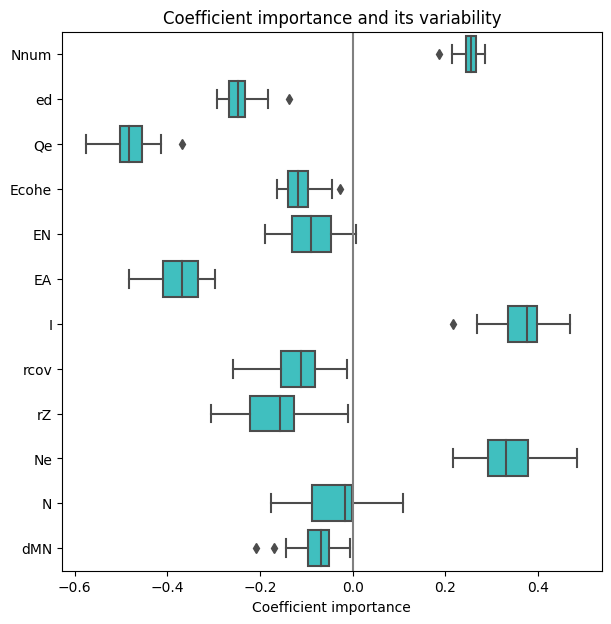

In [28]:
cv_model = cross_validate(
   model, x, y, cv=RepeatedKFold(n_splits=5, n_repeats=5),
   return_estimator=True, n_jobs=2
)
coefs = pd.DataFrame(
   [model[1].coef_
    for model in cv_model['estimator']],
   columns=x.columns
)
plt.figure(figsize=(9, 7))
sns.boxplot(data=coefs, orient='h', color='cyan', saturation=0.5)
plt.axvline(x=0, color='.5')
plt.xlabel('Coefficient importance')
plt.title('Coefficient importance and its variability')
plt.subplots_adjust(left=.3)

### 3. Lasso 기반 Feautre importance

In [29]:
model = make_pipeline(StandardScaler(), Lasso(alpha=.015))

model.fit(x_train, y_train)

print(f'model score on training data: {model.score(x_train, y_train)}')
print(f'model score on testing data: {model.score(x_test, y_test)}')

model score on training data: 0.9205143909169117
model score on testing data: 0.8887134259524362


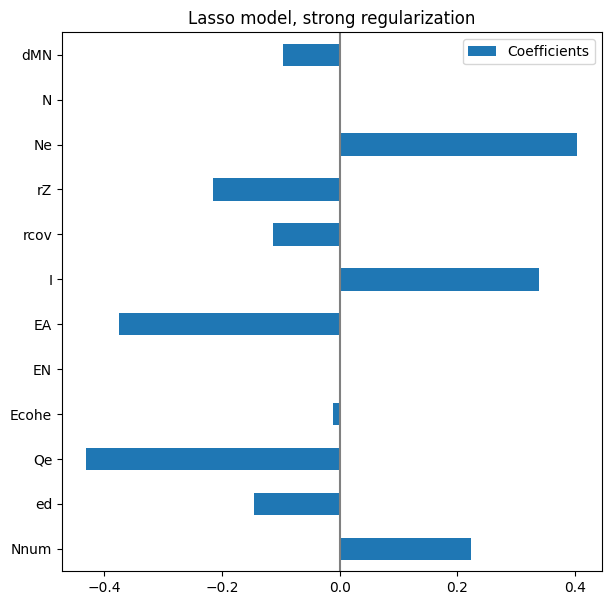

In [30]:
coefs = pd.DataFrame(
   model[1].coef_,
   columns=['Coefficients'], index=x_train.columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Lasso model, strong regularization')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

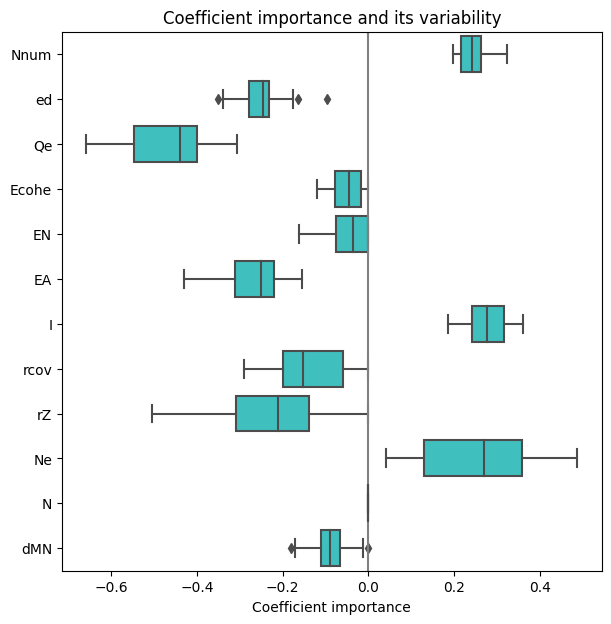

In [31]:
cv_model = cross_validate(
   model, x, y, cv=RepeatedKFold(n_splits=5, n_repeats=5),
   return_estimator=True, n_jobs=2
)
coefs = pd.DataFrame(
   [model[1].coef_
    for model in cv_model['estimator']],
   columns=x.columns
)
plt.figure(figsize=(9, 7))
sns.boxplot(data=coefs, orient='h', color='cyan', saturation=0.5)
plt.axvline(x=0, color='.5')
plt.xlabel('Coefficient importance')
plt.title('Coefficient importance and its variability')
plt.subplots_adjust(left=.3)

### 4. Permutation 기반 feature importance (random forest)

In [32]:
model = rf_rnd_search.best_estimator_

In [33]:
def get_score_after_permutation(model, X, y, curr_feat):
    """ return the score of model when curr_feat is permuted """

    X_permuted = X.copy()
    col_idx = list(X.columns).index(curr_feat)
    # permute one column
    X_permuted.iloc[:, col_idx] = np.random.permutation(
        X_permuted[curr_feat].values)

    permuted_score = model.score(X_permuted, y)
    return permuted_score


def get_feature_importance(model, X, y, curr_feat):
    """ compare the score when curr_feat is permuted """

    baseline_score_train = model.score(X, y)
    permuted_score_train = get_score_after_permutation(model, X, y, curr_feat)

    # feature importance is the difference between the two scores
    feature_importance = baseline_score_train - permuted_score_train
    return feature_importance

def permutation_importance(model, X, y, n_repeats=10):
    """Calculate importance score for each feature."""

    importances = []
    for curr_feat in X.columns:
        list_feature_importance = []
        for n_round in range(n_repeats):
            list_feature_importance.append(
                get_feature_importance(model, X, y, curr_feat))

        importances.append(list_feature_importance)

    return {'importances_mean': np.mean(importances, axis=1),
            'importances_std': np.std(importances, axis=1),
            'importances': importances}

def plot_feature_importances(perm_importance_result, feat_name):
    """ bar plot the feature importance """

    fig, ax = plt.subplots()

    indices = perm_importance_result['importances_mean'].argsort()
    plt.barh(range(len(indices)),
             perm_importance_result['importances_mean'][indices],
             xerr=perm_importance_result['importances_std'][indices])

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices])

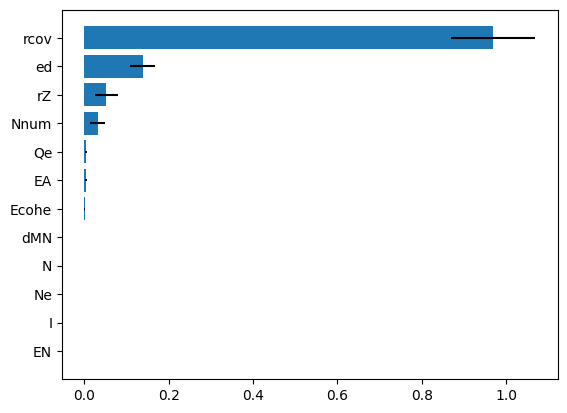

In [34]:
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)

perm_importance_result_train = permutation_importance(
    model, x_train_scaled_df, y_train, n_repeats=10)

plot_feature_importances(perm_importance_result_train, x_train.columns)

# 상관계수 분석

In [35]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show()

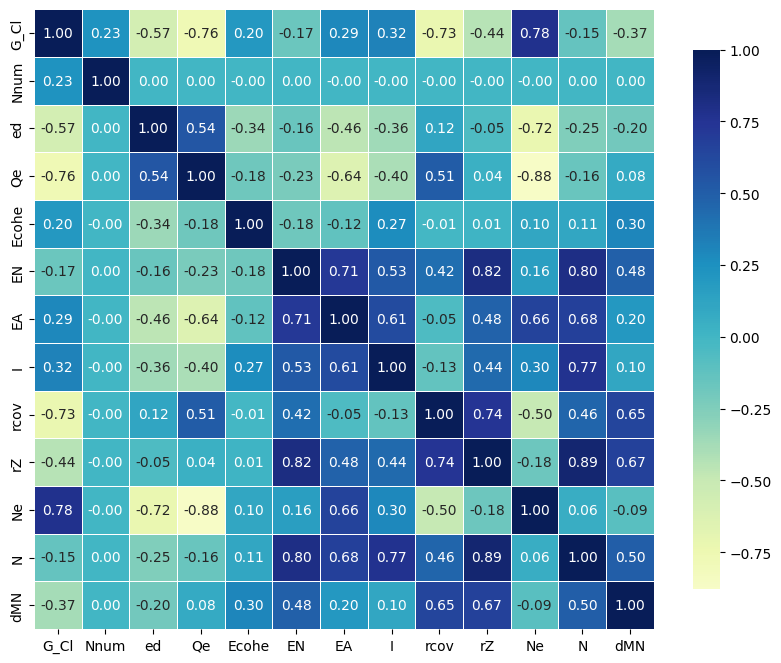

In [36]:
corr = raw_data.iloc[:,1:]
feature_names_corr = np.array(['G_Cl','Nnum', 'ed', 'Qe', 'Ecohe', 'EN', 'EA', 'I', 'rcov', 'rZ', 'Ne', 'N', 'dMN'])

correlation_heatmap(corr[feature_names_corr])

### PCA 분석

#### G_Cl 미포함

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(x_scaled)

In [38]:
pca.explained_variance_ratio_

array([0.373288  , 0.26957951])

(75,)


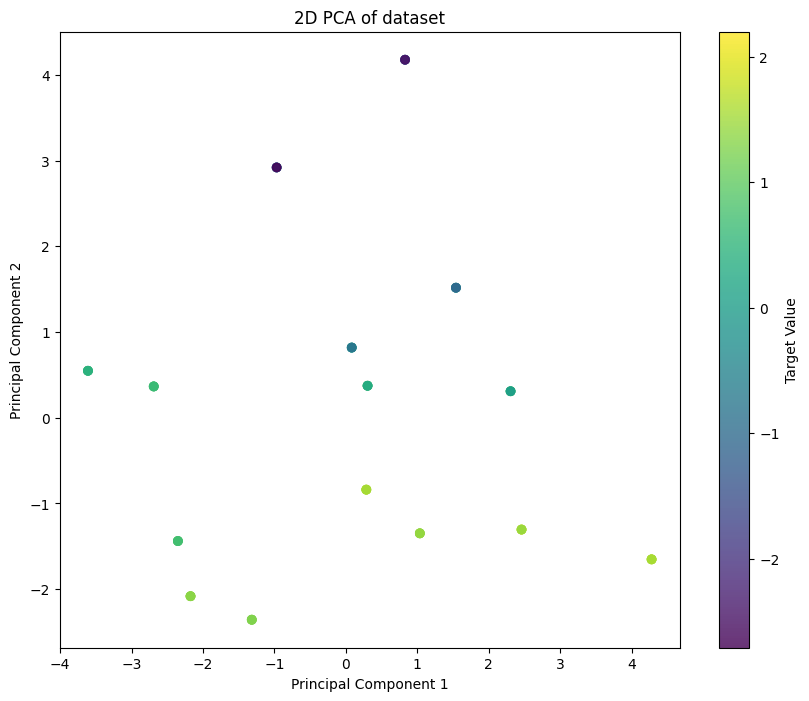

In [39]:
# scatter plot
plt.figure(figsize=(10, 8))
print(X2D[:, 1].shape)
scatter = plt.scatter(X2D[:, 0], X2D[:, 1], c=y, alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of dataset')

#plt.xlim(-10, 10)   # x축 범위 설정
#plt.ylim(-10, 10)   # y축 범위 설정

# Add a color bar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Target Value')

plt.show()

#### G_Cl 포함

In [40]:
pca = PCA(n_components = 2)
X2D = pca.fit_transform(corr)

In [41]:
pca.explained_variance_ratio_

array([0.9785241 , 0.01197474])

(75,)


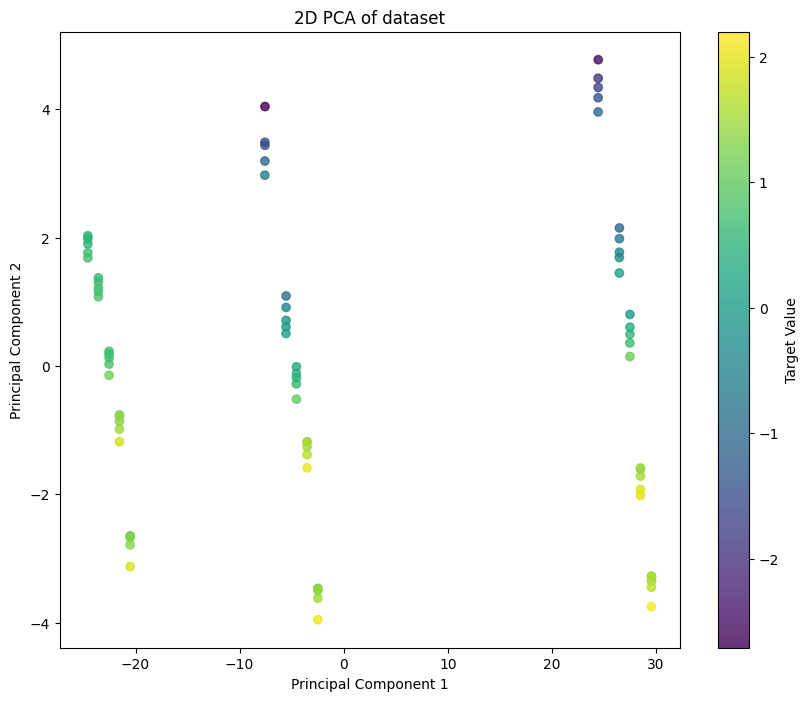

In [42]:
# scatter plot
plt.figure(figsize=(10, 8))
print(X2D[:, 1].shape)
scatter = plt.scatter(X2D[:, 0], X2D[:, 1], c=y, alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of dataset')

#plt.xlim(-10, 10)   # x축 범위 설정
#plt.ylim(-10, 10)   # y축 범위 설정

# Add a color bar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Target Value')

plt.show()